# 03 模型保存载入与绘制

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
# 载入数据
(x_train,y_train),(x_test,y_test) = mnist.load_data()
# (60000,28,28)
print('x_shape:',x_train.shape)
# (60000)
print('y_shape:',y_train.shape)
# (60000,28,28)->(60000,784)
x_train = x_train.reshape(x_train.shape[0],-1)/255.0
x_test = x_test.reshape(x_test.shape[0],-1)/255.0
# 换one hot格式
y_train = np_utils.to_categorical(y_train,num_classes=10)
y_test = np_utils.to_categorical(y_test,num_classes=10)

# 创建模型，输入784个神经元，输出10个神经元
model = Sequential([
        Dense(units=10,input_dim=784,bias_initializer='one',activation='softmax')
    ])

# 定义优化器
sgd = SGD(lr=0.2)

# 定义优化器，loss function，训练过程中计算准确率
model.compile(
    optimizer = sgd,
    loss = 'mse',
    metrics=['accuracy'],
)

# 训练模型
model.fit(x_train,y_train,batch_size=64,epochs=5)

# 评估模型
loss,accuracy = model.evaluate(x_test,y_test)

print('\ntest loss',loss)
print('accuracy',accuracy)

x_shape: (60000, 28, 28)
y_shape: (60000,)
Epoch 1/5
60000/60000 [==============================] - 3s 56us/step - loss: 0.0498 - acc: 0.7014
Epoch 2/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.0254 - acc: 0.8589
Epoch 3/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.0212 - acc: 0.8767
Epoch 4/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.0193 - acc: 0.8852
Epoch 5/5
10000/10000 [==============================] - 0s 38us/step

test loss 0.01667219642046839
accuracy 0.8997


In [3]:
# 保存模型
model.save('./data/model.h5')   # HDF5文件，pip install h5py

### 模型载入

In [4]:
from keras.models import load_model

# 载入模型
model = load_model('./data/model.h5')

# 评估模型
loss,accuracy = model.evaluate(x_test,y_test)

print('\ntest loss',loss)
print('accuracy',accuracy)

10000/10000 [==============================] - 0s 42us/step

test loss 0.01667219642046839
accuracy 0.8997


In [5]:
# 训练模型
model.fit(x_train,y_train,batch_size=64,epochs=2)

# 评估模型
loss,accuracy = model.evaluate(x_test,y_test)

print('\ntest loss',loss)
print('accuracy',accuracy)

Epoch 1/2
60000/60000 [==============================] - 2s 40us/step - loss: 0.0173 - acc: 0.8956
Epoch 2/2
10000/10000 [==============================] - 0s 29us/step

test loss 0.015516782426834106
accuracy 0.9057


In [6]:
from keras.models import model_from_json

# 保存参数，载入参数
model.save_weights('./data/my_model_weights.h5')
model.load_weights('./data/my_model_weights.h5')

# 保存网络结构，载入网络结构
json_string = model.to_json()
model = model_from_json(json_string)

In [7]:
print(json_string)

{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "batch_input_shape": [null, 784], "dtype": "float32", "units": 10, "activation": "softmax", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Ones", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}]}, "keras_version": "2.2.4", "backend": "tensorflow"}


### 绘制网络结构

In [8]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt 
# install pydot and graphviz

In [9]:
# 载入数据
(x_train,y_train),(x_test,y_test) = mnist.load_data()
# (60000,28,28)->(60000,28,28,1)
x_train = x_train.reshape(-1,28,28,1)/255.0
x_test = x_test.reshape(-1,28,28,1)/255.0
# 换one hot格式
y_train = np_utils.to_categorical(y_train,num_classes=10)
y_test = np_utils.to_categorical(y_test,num_classes=10)

# 定义顺序模型
model = Sequential()

# 第一个卷积层
# input_shape 输入平面
# filters 卷积核/滤波器个数
# kernel_size 卷积窗口大小
# strides 步长
# padding padding方式 same/valid
# activation 激活函数
model.add(Convolution2D(
    input_shape = (28,28,1),
    filters = 32,
    kernel_size = 5,
    strides = 1,
    padding = 'same',
    activation = 'relu',
    name = 'conv1'
))
# 第一个池化层
model.add(MaxPooling2D(
    pool_size = 2,
    strides = 2,
    padding = 'same',
    name = 'pool1'
))
# 第二个卷积层
model.add(Convolution2D(64,5,strides=1,padding='same',activation = 'relu',name='conv2'))
# 第二个池化层
model.add(MaxPooling2D(2,2,'same',name='pool2'))
# 把第二个池化层的输出扁平化为1维
model.add(Flatten())
# 第一个全连接层
model.add(Dense(1024,activation = 'relu'))
# Dropout
model.add(Dropout(0.5))
# 第二个全连接层
model.add(Dense(10,activation='softmax'))

# # 定义优化器
# adam = Adam(lr=1e-4)

# # 定义优化器，loss function，训练过程中计算准确率
# model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

# # 训练模型
# model.fit(x_train,y_train,batch_size=64,epochs=1)

# # 评估模型
# loss,accuracy = model.evaluate(x_test,y_test)

# print('test loss',loss)
# print('test accuracy',accuracy)

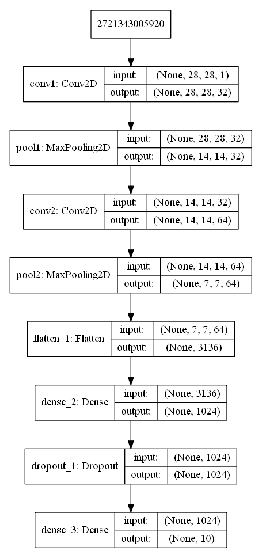

In [10]:
plot_model(model,to_file="./data/model.png",show_shapes=True,show_layer_names=True,rankdir='TB')
plt.figure(figsize=(10,10))
img = plt.imread("./data/model.png")
plt.imshow(img)
plt.axis('off')
plt.show()